# Import Libraries and Data

In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv('../data/crashes_cleaned.csv')

In [68]:
df.head()

,posted_speed_limit,weather_condition,lighting_condition,alignment,roadway_surface_cond,num_units,crash_hour,crash_day_of_week,crash_month,sex,age,serious_accident
0,35,CLEAR,DAYLIGHT,STRAIGHT AND LEVEL,DRY,2,15,1,5,1,44.0,0
1,25,CLEAR,DAYLIGHT,CURVE ON GRADE,DRY,2,7,6,6,1,71.0,0
2,15,CLEAR,DAYLIGHT,STRAIGHT AND LEVEL,DRY,2,16,3,9,1,60.0,0
3,30,CLEAR,DAYLIGHT,STRAIGHT AND LEVEL,SNOW OR SLUSH,2,9,6,3,1,38.0,0
4,30,RAIN,"DARKNESS, LIGHTED ROAD",STRAIGHT AND LEVEL,WET,2,5,4,3,1,52.0,0


Filter out serious accidents

In [69]:
df_ser = df.loc[df['serious_accident'] == 1]
df_notser = df.loc[df['serious_accident'] == 0]

# Age

See all accidents by age

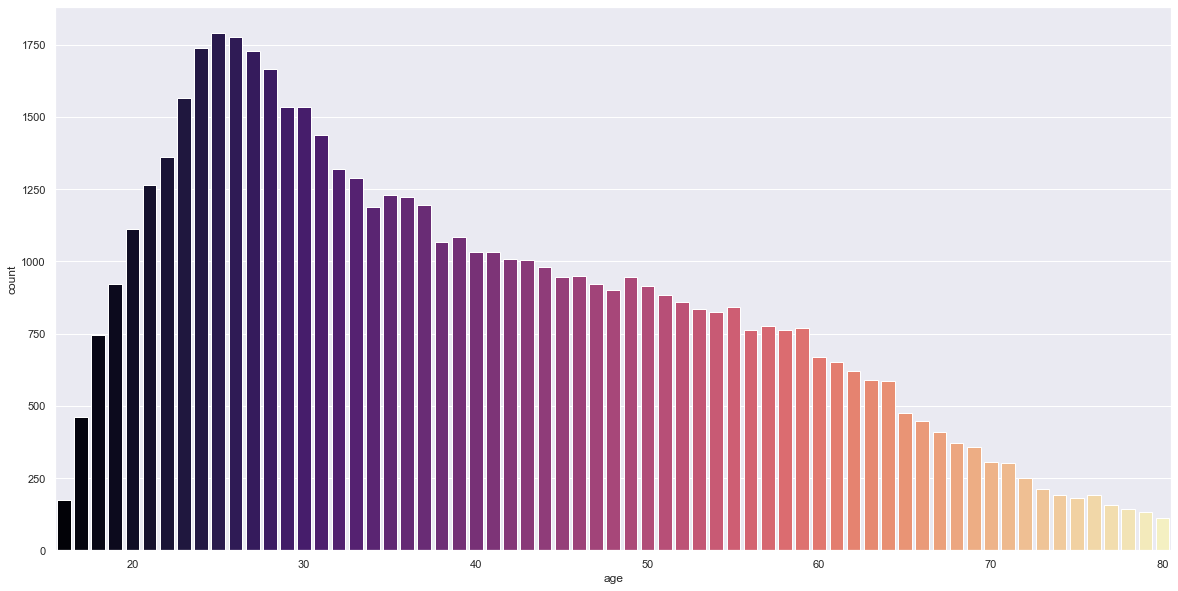

In [70]:
size = (20, 10)
fig, ax = plt.subplots(figsize=size)
plot = sns.countplot(x = 'age', data = df, palette = 'magma')
plot.set_xticks([4, 14, 24, 34, 44, 54, 64])
plot.set_xticklabels([20, 30, 40, 50, 60, 70, 80]) 
plt.show()

In [71]:
# fig.savefig('images/driver_age.png')

It seems the age of accidents tracks more or less with serious accidents.

# Sex

Let's see about sex.

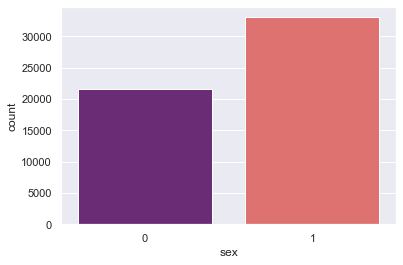

In [72]:
# fig, ax = plt.subplots(figsize=size)
sns.set
sns.countplot(x = 'sex', data = df_notser, palette = 'magma')

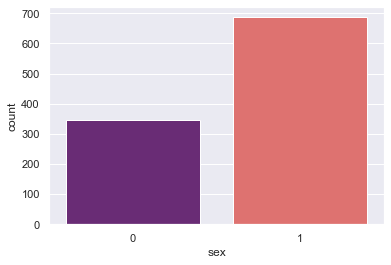

In [73]:
# fig, ax = plt.subplots(figsize=size)
sns.countplot(x = 'sex', data = df_ser, palette = 'magma')

It seems that men are more likely to be in serious accidents

In [74]:
df_ser['sex'].value_counts()

1    687
0    345
Name: sex, dtype: int64

In [75]:
len(df_ser)

1032

In [76]:
percent_men_serious = round(687/len(df_ser) * 100, 1)
percent_men_serious

66.6

In [77]:
percent_fem_serious = round(345/len(df_ser) * 100, 1)
percent_fem_serious

33.4

In [78]:
df_notser['sex'].value_counts()

1    33077
0    21609
Name: sex, dtype: int64

In [79]:
percent_men_notser = round (33077/len(df_notser) * 100, 1)
percent_men_notser

60.5

In [80]:
percent_fem_notser = round(21609/len(df_notser) * 100, 1)
percent_fem_notser

39.5

In [81]:
df_sex = pd.DataFrame(data=[[percent_men_notser, percent_fem_notser], [percent_men_serious, percent_fem_serious]], 
                       columns=['not serious', 'serious'], index=['male', 'female'])
df_sex 

,not serious,serious
male,60.5,39.5
female,66.6,33.4


In [82]:
df_sex2 = pd.DataFrame(columns=['sex', 'severity', 'percentage'], data=[['male', 'severe', percent_men_serious], 
                                                                        ['female', 'severe', percent_fem_serious],
                                                                        ['male', 'not severe', percent_men_notser], 
                                                                        ['female', 'not severe', percent_fem_notser]])
df_sex2

,sex,severity,percentage
0,male,severe,66.6
1,female,severe,33.4
2,male,not severe,60.5
3,female,not severe,39.5


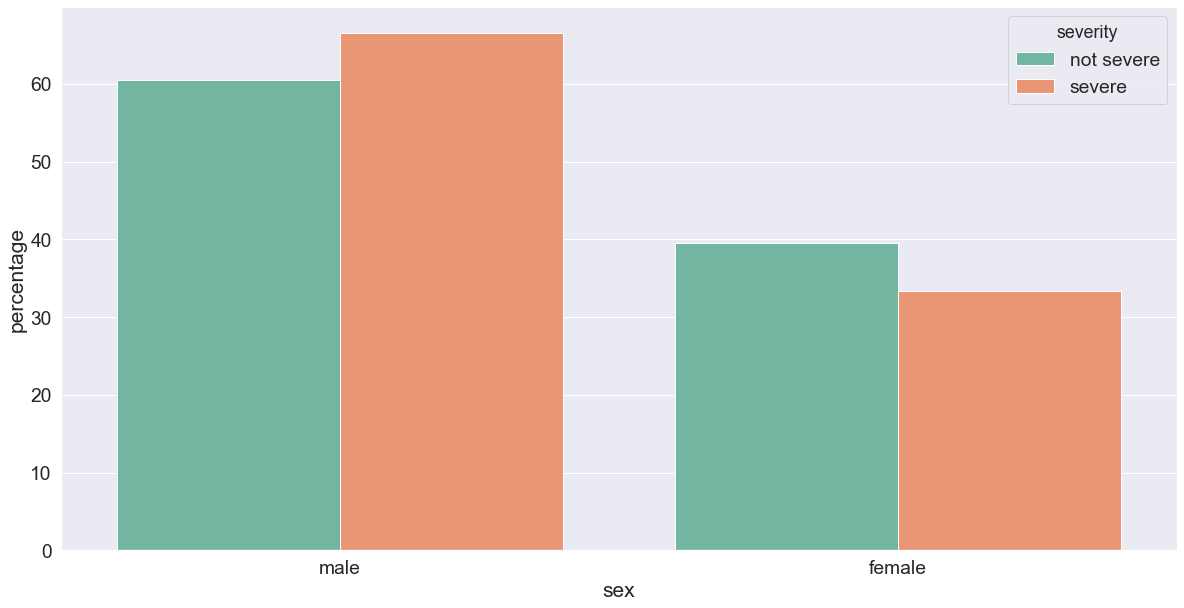

In [83]:
sns.set(font_scale=1.75)
size = (20, 10)
fig, ax = plt.subplots(figsize=size)
ax = sns.barplot(x='sex', y='percentage', hue="severity", hue_order=['not severe', 'severe'], data=df_sex2, 
                 palette = 'Set2')

In [84]:
# fig.savefig('images/sex-severity.png')

# Num Units

In [85]:
df_ser['num_units'].value_counts()

2    744
3    135
1     99
4     31
5     15
6      8
Name: num_units, dtype: int64

In [86]:
df_notser['num_units'].value_counts()

2    48365
3     2918
1     2731
4      486
5      127
6       59
Name: num_units, dtype: int64

In [87]:
tot_ser_num_units =  df_ser['num_units'].value_counts().sum()
for index, value in df_ser['num_units'].value_counts().items():
    print(index)
    print(round(value/tot_ser_num_units * 100, 1))

2
72.1
3
13.1
1
9.6
4
3.0
5
1.5
6
0.8


In [88]:
tot_notser_num_units =  df_notser['num_units'].value_counts().sum()
for index, value in df_notser['num_units'].value_counts().items():
    print(index)
    print(round(value/tot_notser_num_units * 100, 1))

2
88.4
3
5.3
1
5.0
4
0.9
5
0.2
6
0.1


In [89]:
num_vcls = []
for index, value in df_ser['num_units'].value_counts().items():
    num_vcls.append([index, 'severe', round(value/tot_ser_num_units * 100, 1)])
num_vcls

[[2, 'severe', 72.1],
 [3, 'severe', 13.1],
 [1, 'severe', 9.6],
 [4, 'severe', 3.0],
 [5, 'severe', 1.5],
 [6, 'severe', 0.8]]

In [90]:
for index, value in df_notser['num_units'].value_counts().items():
    num_vcls.append([index, 'not severe', round(value/tot_notser_num_units * 100, 1)])
num_vcls

[[2, 'severe', 72.1],
 [3, 'severe', 13.1],
 [1, 'severe', 9.6],
 [4, 'severe', 3.0],
 [5, 'severe', 1.5],
 [6, 'severe', 0.8],
 [2, 'not severe', 88.4],
 [3, 'not severe', 5.3],
 [1, 'not severe', 5.0],
 [4, 'not severe', 0.9],
 [5, 'not severe', 0.2],
 [6, 'not severe', 0.1]]

In [91]:
vcl_df = pd.DataFrame(columns=['number of vehicles', 'severity', 'percentage'], data=num_vcls)
vcl_df

,number of vehicles,severity,percentage
0,2,severe,72.1
1,3,severe,13.1
2,1,severe,9.6
3,4,severe,3.0
4,5,severe,1.5
5,6,severe,0.8
6,2,not severe,88.4
7,3,not severe,5.3
8,1,not severe,5.0
9,4,not severe,0.9


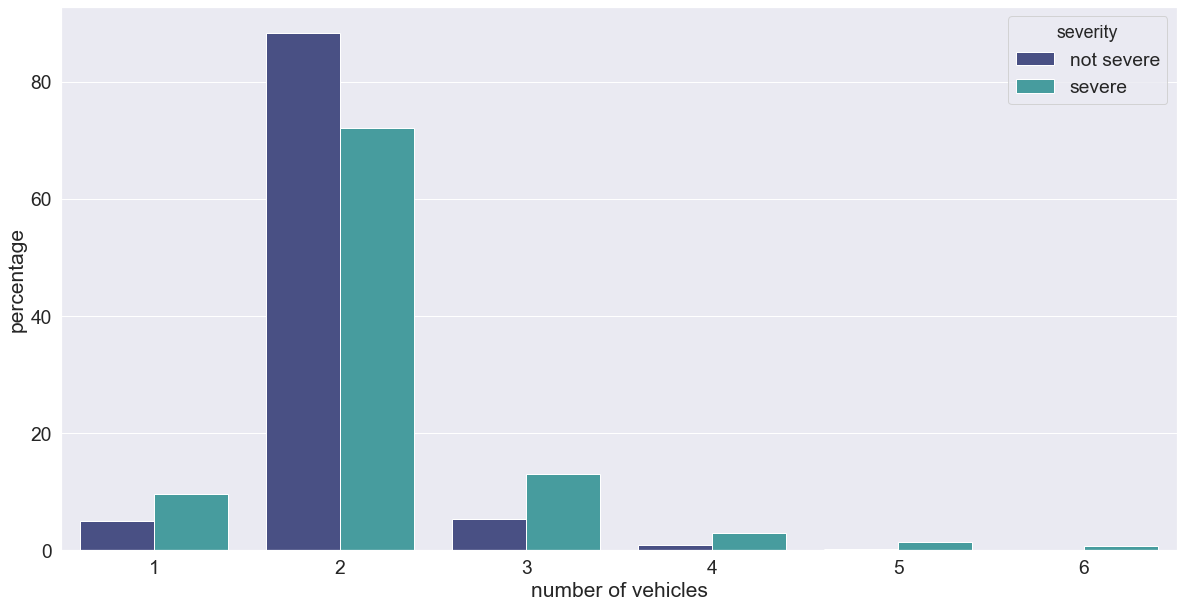

In [92]:
size = (20, 10)
figure, ax = plt.subplots(figsize=size)
ax = sns.barplot(x='number of vehicles', y='percentage', hue="severity", hue_order=['not severe', 'severe'], 
                 data=vcl_df, palette = 'mako')

In [93]:
# figure.savefig('images/num-vehicles-severity.png')

# Important Features

In [94]:
important_features = [('lighting_condition_darkness, lighted road', 17.62), ('crash_day_of_week_5', 15.83), ('num_units', 14.61), 
                      ('posted_speed_limit', 13.94), ('roadway_surface_cond_unknown', 10.15), ('crash_month_9', 9.29), 
                      ('crash_day_of_week_2', 6.28), ('crash_month_11', 6.26), ('sex', 4.45), ('crash_month_6', 0.87)]

In [95]:
feat_df = pd.DataFrame(important_features, columns=["feature", "importance"])
feat_df

,feature,importance
0,"lighting_condition_darkness, lighted road",17.62
1,crash_day_of_week_5,15.83
2,num_units,14.61
3,posted_speed_limit,13.94
4,roadway_surface_cond_unknown,10.15
5,crash_month_9,9.29
6,crash_day_of_week_2,6.28
7,crash_month_11,6.26
8,sex,4.45
9,crash_month_6,0.87


In [96]:
feat_to_replace = feat_df['feature'].tolist()
feat_df.replace(feat_to_replace, ['darkness, lighted road', 'Thursday', 'number of vehicles', 'posted speed limit', 'unknown surface condition',
                                 'September', 'Monday', 'November', 'sex', 'June'], inplace=True)
feat_df

,feature,importance
0,"darkness, lighted road",17.62
1,Thursday,15.83
2,number of vehicles,14.61
3,posted speed limit,13.94
4,unknown surface condition,10.15
5,September,9.29
6,Monday,6.28
7,November,6.26
8,sex,4.45
9,June,0.87


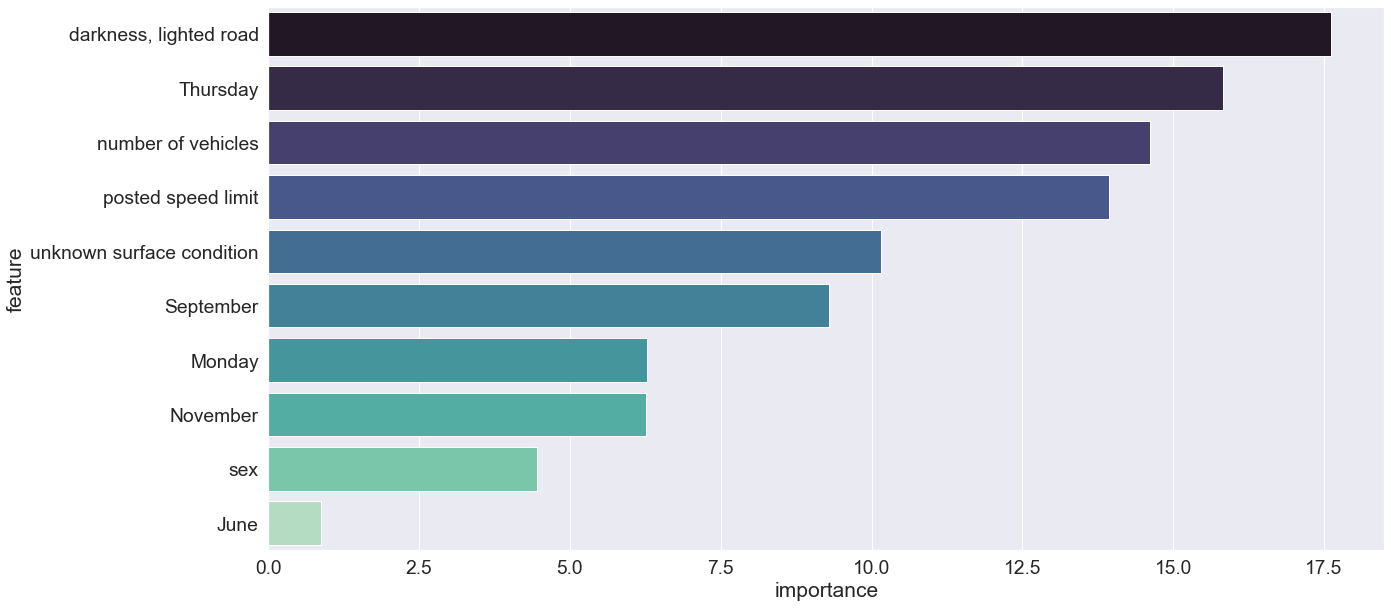

In [107]:
size = (20, 10)
figure, ax = plt.subplots(figsize=size)
ax = sns.barplot(x='importance', y='feature', data=feat_df, palette = 'mako')

In [108]:
figure.savefig('images/important-features.png')

# Posted Speed Limit

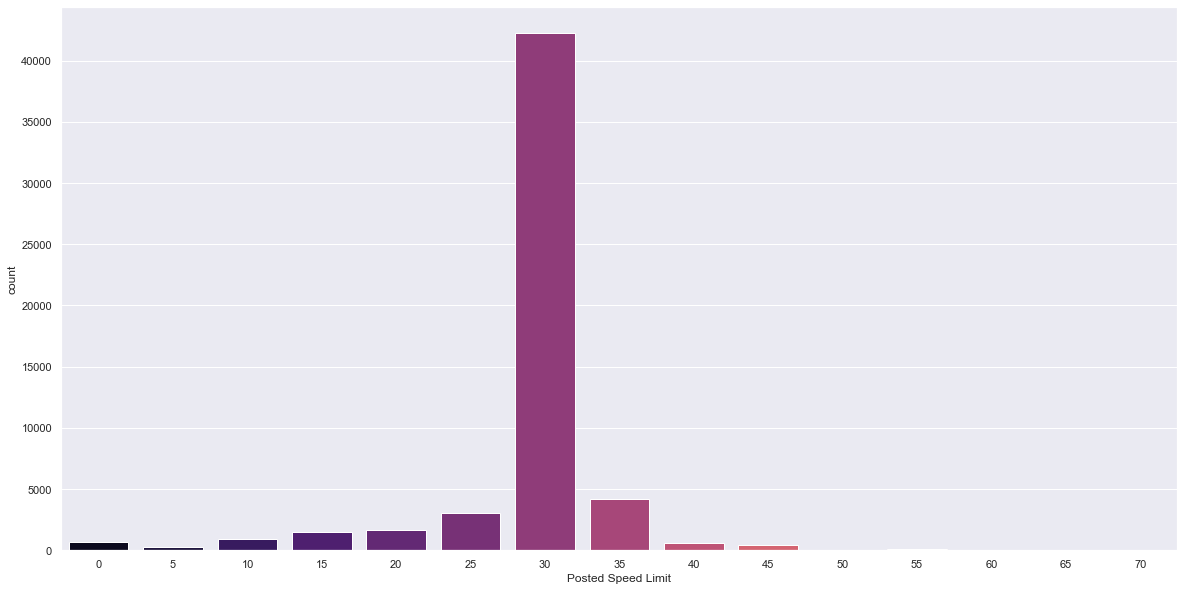

In [35]:
sns.set(font_scale=1)
size = (20, 10)
fig, ax = plt.subplots(figsize=size)
plot = sns.countplot(x = 'posted_speed_limit', data = df, palette = 'magma')
plot.set(xlabel="Posted Speed Limit")
plt.show()

In [36]:
# fig.savefig('images/posted-speed-limit.png')

In [58]:
tot_notser_posted_speed =  df_notser['posted_speed_limit'].value_counts().sum()
tot_ser_posted_speed = df_ser['posted_speed_limit'].value_counts().sum()
# for index, value in df_notser['posted_speed_limit'].value_counts().items():
#     print(index)
#     print(round(value/tot_notser_posted_speed * 100, 1))

In [59]:
posted_speed = []

# serious
for index, value in df_ser['posted_speed_limit'].value_counts().items():
    posted_speed.append([index, 'severe', round(value/tot_ser_posted_speed * 100, 1)])
    
# not serious
for index, value in df_notser['posted_speed_limit'].value_counts().items():
    posted_speed.append([index, 'not severe', round(value/tot_notser_posted_speed * 100, 1)])   

posted_speed

[[30, 'severe', 75.4],
 [35, 'severe', 10.5],
 [25, 'severe', 4.7],
 [40, 'severe', 2.3],
 [20, 'severe', 2.1],
 [15, 'severe', 1.6],
 [45, 'severe', 1.2],
 [10, 'severe', 0.9],
 [0, 'severe', 0.7],
 [55, 'severe', 0.3],
 [5, 'severe', 0.3],
 [65, 'severe', 0.1],
 [30, 'not severe', 75.9],
 [35, 'not severe', 7.5],
 [25, 'not severe', 5.5],
 [20, 'not severe', 3.0],
 [15, 'not severe', 2.7],
 [10, 'not severe', 1.6],
 [0, 'not severe', 1.3],
 [40, 'not severe', 1.0],
 [45, 'not severe', 0.7],
 [5, 'not severe', 0.5],
 [55, 'not severe', 0.1],
 [50, 'not severe', 0.0],
 [60, 'not severe', 0.0],
 [70, 'not severe', 0.0],
 [65, 'not severe', 0.0]]

In [60]:
speed_df = pd.DataFrame(columns=['posted speed limit', 'severity', 'percentage'], data=posted_speed)
speed_df

,posted speed limit,severity,percentage
0,30,severe,75.4
1,35,severe,10.5
2,25,severe,4.7
3,40,severe,2.3
4,20,severe,2.1
5,15,severe,1.6
6,45,severe,1.2
7,10,severe,0.9
8,0,severe,0.7
9,55,severe,0.3


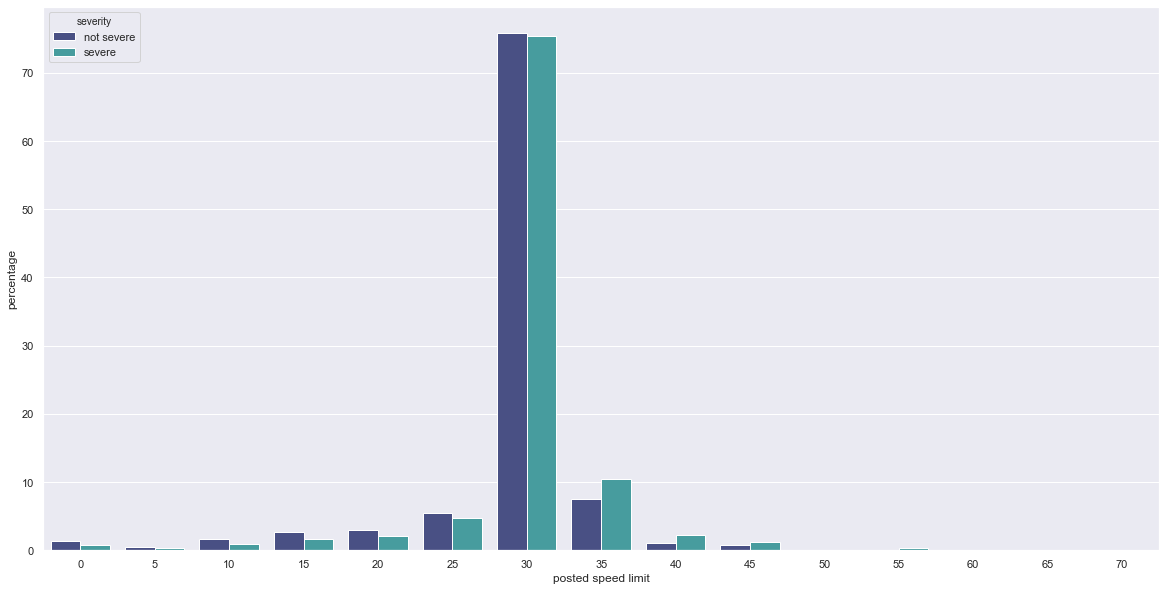

In [61]:
# size = (20, 10)
figure, ax = plt.subplots(figsize=size)
ax = sns.barplot(x='posted speed limit', y='percentage', hue="severity", hue_order=['not severe', 'severe'], 
                 data=speed_df, palette = 'mako')

I'll remove speeds over 60 or where it's close to 0 because there isn't enough data.

In [62]:
speed_df.drop([11, 23, 24, 25, 26], inplace=True)
speed_df

,posted speed limit,severity,percentage
0,30,severe,75.4
1,35,severe,10.5
2,25,severe,4.7
3,40,severe,2.3
4,20,severe,2.1
5,15,severe,1.6
6,45,severe,1.2
7,10,severe,0.9
8,0,severe,0.7
9,55,severe,0.3


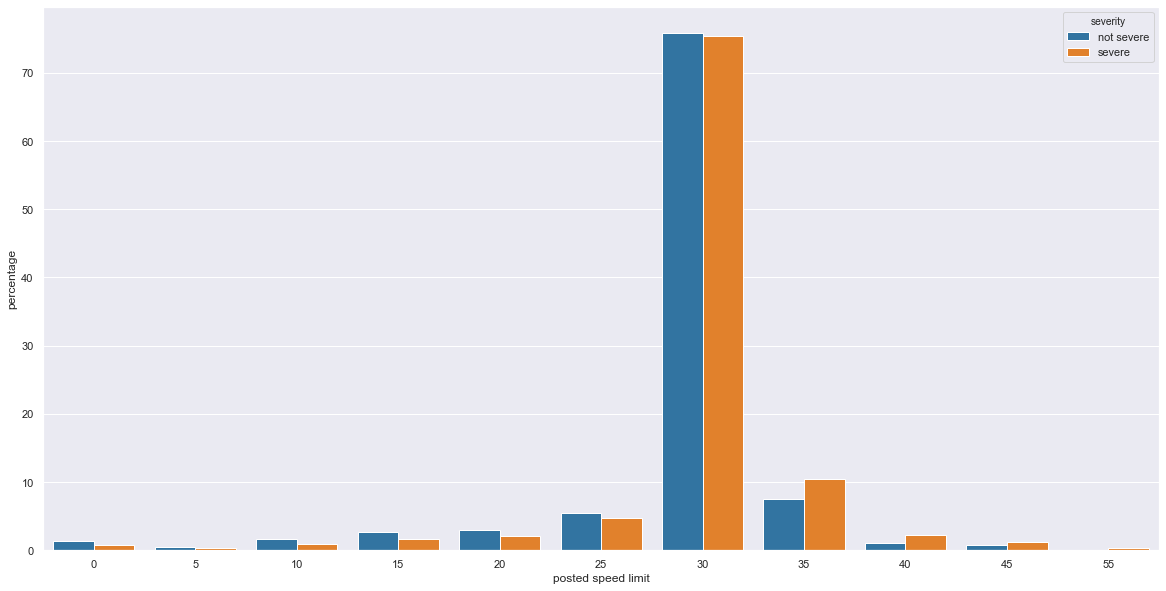

In [64]:
size = (20, 10)
figure, ax = plt.subplots(figsize=size)
ax = sns.barplot(x='posted speed limit', y='percentage', hue="severity", hue_order=['not severe', 'severe'], 
                 data=speed_df, palette = 'tab10')

In [65]:
fig.savefig('images/posted-speed-limit-severe-notsevere.png')